## 1. Visualizing our Data

We are plotting some graphs to see how our data works.

In [ ]:
import io
#Returns the number of. # objects it has collected. # and deallocated
import gc
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
#along with a large collection of high-level mathematical functions to operate on these arrays
import numpy
##pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas
%matplotlib inline
#A word cloud (also called tag cloud or weighted list) is a visual representation of text data. Words are usually single words,
 #and the importance of each is shown with font size or color. Python fortunately has a wordcloud library allowing to build them.
from wordcloud import WordCloud
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as matplotlib
#Seaborn is a Python data visualization library based on matplotlib
import seaborn
import string
#The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in
#statistical natural language processing (NLP)
import nltk
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations,
# and words that start sentences.
nltk.download('punkt')
import nltk
#The WordNet is a part of Python's Natural Language Toolkit. It is a large word database of English Nouns, Adjectives, Adverbs and Verbs.
nltk.download('wordnet')
#Regular expression or RegEx in Python is denoted as RE (REs, regexes or regex pattern) are imported through re module.
#Python supports regular expression through libraries.
import re
# FOR STOP WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# FOR LEMMATIZATION - Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# FOR STEMMING
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
# FOR TOKENIZATION
from nltk.tokenize import word_tokenize
from collections import Counter
#Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.
#It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).
 #The term frequency is the number of occurrences of a specific term in a document

 #The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets
 # consisting of formats such as text and image.


from sklearn.feature_extraction.text import TfidfVectorizer

#The accuracy_score method is used to calculate the accuracy of either the faction or count of correct prediction in Python Scikit learn.

#A Classification report is used to measure the quality of predictions from a classification algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve
#the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based
 #on the majority votes of predictions, and it predicts the final output.
from sklearn.ensemble import RandomForestClassifier
# It is a tree-structured
#classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from keras.layers import Dense , Input , LSTM , Embedding, Dropout, Conv1D, MaxPooling1D, Activation, GRU, Flatten
#Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers import Dense, Flatten, Convolution1D
#pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence
# until each sequence has the same length as the longest sequence.

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from numpy import asarray
from numpy import array
from numpy import zeros
import keras

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Reviews = pandas.read_csv('/content/Data.csv')
Reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


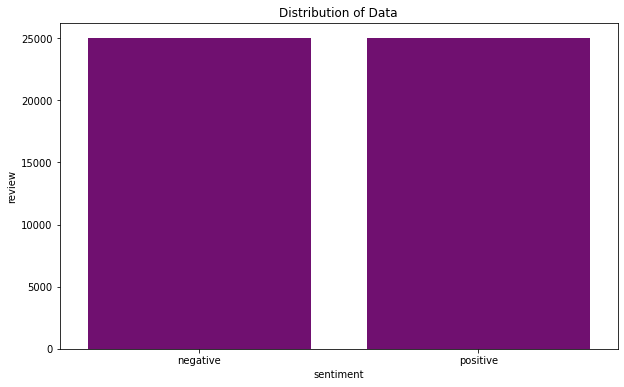

In [ ]:
# Plotting the distribution for dataset.
ax = pandas.DataFrame(Reviews.groupby(['sentiment'], axis=0, as_index=False).count())
matplotlib.figure(figsize=(10,6))
matplotlib.title("Distribution of Data")
seaborn.barplot(x="sentiment",y="review",data=ax,color='purple')

In [ ]:
def clear_sentence(sentence: str) -> str:
    sentence = sentence.replace('<br />', ' ')
    sentence = sentence.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    sentence = sentence.lower()
    return sentence

def data_preprocessing(raw_text: str) -> list:

    #Data Cleansing
    sentence = re.sub(r'[^\w\s]', ' ',raw_text )


    #Removing numbers
    sentence = re.sub(r'[0-9]', '', sentence)

    #Tokenization
    words = nltk.word_tokenize(sentence)

    #Lowercase
    for word in words:
            word.lower()

    #Stop words removal
    words = [w for w in words if not w in stop_words]

    #stemming
    words = [stemmer.stem(w) for w in words]

    #Lemmatization
    final_words = [lemmatizer.lemmatize(w) for w in words]

    return  final_words

print("Cleaning sentences...")
Reviews['review'] = Reviews['review'].apply(clear_sentence)
print("Data preprocessing...")
Reviews['cleaned'] = Reviews['review'].apply(data_preprocessing)

Cleaning sentences...
Data preprocessing...


50000 total reviews:
   Without stopwords:	range [3 - 1422] 	mean: 118 - standard: 89
   With stopwords:	range [6 - 2505] 	mean: 236 - standard: 174
25000 positive reviews:
   Without stopwords:	range [6 - 1422] 	mean: 120 - standard: 93
   With stopwords:	range [10 - 2505] 	mean: 237 - standard: 180
25000 negative reviews:
   Without stopwords:	range [3 - 809] 	mean: 116 - standard: 85
   With stopwords:	range [6 - 1552] 	mean: 234 - standard: 168


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


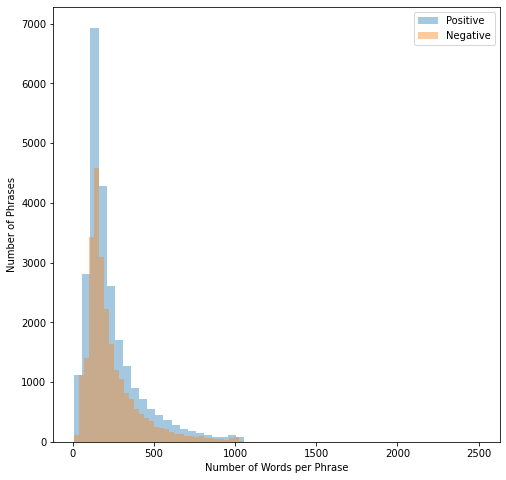

,Common Words,#C,Negative Words,#N,Positive Words,#P
0,movi,103284,movi,58433,film,50898
1,film,95891,film,44993,movi,44851
2,one,55453,one,27163,one,28290
3,like,45210,like,24648,like,20562
4,time,31968,make,16221,time,16632
5,good,30199,bad,15863,good,15266
6,make,30035,even,15452,see,15141
7,charact,28364,time,15336,stori,14190
8,see,28244,get,15279,charact,14030
9,get,27973,watch,14976,make,13814


In [ ]:
def EDA_function():
    # Let's take a small look on how many postives and negatives our reviews have
    # for completeness sake, let's look at both sentences with stopwords and without them.
    EDA = Reviews.copy()
    EDA['#_no_stopwords'] = EDA['cleaned'].apply(len)
    EDA['#_with_stopwords'] = EDA['review'].apply(str.split).apply(len)

    # Let's prepare our plot
    matplotlib.figure(figsize=(8,8))

    # Let's transform those columns in a dictionary that contains the lists of the numbers of words (with and without stopwords)
    words_EDA = {sentiment: [] for sentiment in ['total','positive','negative']}
    for sentiment in words_EDA:
        words_EDA[sentiment].append(('Without',EDA[EDA['sentiment'] == sentiment]["#_no_stopwords"] if sentiment !='total' else EDA["#_no_stopwords"]))
        words_EDA[sentiment].append(('With',EDA[EDA['sentiment'] == sentiment]["#_with_stopwords"] if sentiment !='total' else EDA["#_with_stopwords"]))
        print(len(words_EDA[sentiment][1][1]),sentiment,'reviews:')
        for choice in words_EDA[sentiment]:
            print(' '*2,choice[0],'stopwords:\trange', '[' + str(choice[1].min()),'-', str(choice[1].max()) + ']','\tmean:',round(choice[1].mean()), '- standard:',round(choice[1].std()))
     #doubt  The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

        if sentiment != 'total':
            seaborn.distplot(words_EDA[sentiment][1][1],kde=False, label=sentiment.capitalize())

    matplotlib.xlabel("Number of Words per Phrase")
    matplotlib.ylabel("Number of Phrases")
    matplotlib.legend()
    matplotlib.show()

def EDA_common_words() -> pandas.DataFrame:
    # Use counter to get the most common words
    dataframes = [pandas.DataFrame(Counter([item for sublist in Reviews['cleaned'] for item in sublist]).most_common(20))]
    for sentiment in ['negative','positive']:
        dataframes.append(pandas.DataFrame(Counter([item for sublist in Reviews[Reviews['sentiment'] == sentiment]['cleaned'] for item in sublist]).most_common(20)))
    dataframe = pandas.concat([dataframes[0],dataframes[1],dataframes[2]], axis=1)
    dataframe.columns = ['Common Words','#C','Negative Words','#N','Positive Words','#P']
    return dataframe

EDA_function()
EDA_common_words().style.background_gradient(cmap='Greys', subset='#C').background_gradient(cmap='Reds', subset='#N').background_gradient(cmap='Greens', subset='#P')

## 1.2 Machine Learning


In [ ]:
# Let's get a slightly bigger part to test a few Machine Learning Algorithms.
# Makes two datasets, x and y, x will be the clear reviews and y will be the sentiment
x = Reviews['review'][0:5000].tolist()
y = Reviews['sentiment'][0:5000].tolist()

print('Results of data with 10% of Testing Dataset\n')
# Split the dataset in a 90%:10%
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

vector1 = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = vector1.fit_transform(X_train)
X_test_vectorized= vector1.transform(X_test)

model1 = LinearSVC()
model1.fit(X_train_vectorized, Y_train)
LS_predicted = model1.predict(X_test_vectorized)
LS_accuracy = accuracy_score(Y_test, LS_predicted)
print('COMPLETE DATASET WITH LinearSVC\nAccuracy:',"{:.2f}".format(LS_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, LS_predicted))
print('Classification Report:\n',classification_report(Y_test, LS_predicted))

model2 = SVC()
model2.fit(X_train_vectorized, Y_train)
S_predicted = model2.predict(X_test_vectorized)
S_accuracy = accuracy_score(Y_test, S_predicted)
print('COMPLETE DATASET WITH SVM\nAccuracy:',"{:.2f}".format(S_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, S_predicted))
print('Classification Report:\n',classification_report(Y_test, S_predicted))

model3 = DecisionTreeClassifier()
model3.fit(X_train_vectorized, Y_train)
D_predicted = model3.predict(X_test_vectorized)
D_accuracy = accuracy_score(Y_test, D_predicted)
print('COMPLETE DATASET WITH DecisionTree\nAccuracy:',"{:.2f}".format(D_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, D_predicted))
print('Classification Report:\n',classification_report(Y_test, D_predicted))

model4 = XGBClassifier()
model4.fit(X_train_vectorized, Y_train)
X_predicted = model4.predict(X_test_vectorized)
X_accuracy = accuracy_score(Y_test, X_predicted)
print('COMPLETE DATASET WITH XGBClassifier\nAccuracy:',"{:.2f}".format(X_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, X_predicted))
print('Classification Report:\n',classification_report(Y_test, X_predicted))

model5 = RandomForestClassifier(n_estimators=100, random_state=0)
model5.fit(X_train_vectorized, Y_train)
R_predicted = model5.predict(X_test_vectorized)
R_accuracy = accuracy_score(Y_test, R_predicted)
print('COMPLETE DATASET WITH RandomForest\nAccuracy:',"{:.2f}".format(R_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, R_predicted))
print('Classification Report:\n',classification_report(Y_test, R_predicted))

print('\nResults of data with 20% of Testing Dataset\n')
# Split the dataset in a 80%:20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

vector2 = TfidfVectorizer(ngram_range=(1, 2))
x_train_vectorized = vector2.fit_transform(x_train)
x_test_vectorized= vector2.transform(x_test)

model6 = LinearSVC()
model6.fit(x_train_vectorized, y_train)
ls_predicted = model6.predict(x_test_vectorized)
ls_accuracy = accuracy_score(y_test, ls_predicted)
print('COMPLETE DATASET WITH LinearSVC\nAccuracy:',"{:.2f}".format(ls_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, ls_predicted))
print('Classification Report:\n',classification_report(y_test, ls_predicted))

model7 = SVC()
model7.fit(x_train_vectorized, y_train)
s_predicted = model7.predict(x_test_vectorized)
s_accuracy = accuracy_score(y_test, s_predicted)
print('COMPLETE DATASET WITH SVM\nAccuracy:',"{:.2f}".format(s_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, s_predicted))
print('Classification Report:\n',classification_report(y_test, s_predicted))

model8 = DecisionTreeClassifier()
model8.fit(x_train_vectorized, y_train)
d_predicted = model8.predict(x_test_vectorized)
d_accuracy = accuracy_score(y_test, d_predicted)
print('COMPLETE DATASET WITH DecisionTree\nAccuracy:',"{:.2f}".format(d_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, d_predicted))
print('Classification Report:\n',classification_report(y_test, d_predicted))

model9 = XGBClassifier()
model9.fit(x_train_vectorized, y_train)
x_predicted = model9.predict(x_test_vectorized)
x_accuracy = accuracy_score(y_test, x_predicted)
print('COMPLETE DATASET WITH XGBClassifier\nAccuracy:',"{:.2f}".format(x_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, x_predicted))
print('Classification Report:\n',classification_report(y_test, x_predicted))

model10 = RandomForestClassifier(n_estimators=100, random_state=0)
model10.fit(x_train_vectorized, y_train)
r_predicted = model10.predict(x_test_vectorized)
r_accuracy = accuracy_score(y_test, r_predicted)
print('COMPLETE DATASET WITH RandomForest\nAccuracy:',"{:.2f}".format(r_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, r_predicted))
print('Classification Report:\n',classification_report(y_test, r_predicted))

print('Results of data with 30% of Testing Dataset\n')
# Split the dataset in a 70%:30%
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

vector3 = TfidfVectorizer(ngram_range=(1, 2))
xtrain_vectorized = vector3.fit_transform(xtrain)
xtest_vectorized= vector3.transform(xtest)

model11 = LinearSVC()
model11.fit(xtrain_vectorized, ytrain)
lspredicted = model11.predict(xtest_vectorized)
lsaccuracy = accuracy_score(ytest, lspredicted)
print('COMPLETE DATASET WITH LinearSVC\nAccuracy:',"{:.2f}".format(lsaccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, lspredicted))
print('Classification Report:\n',classification_report(ytest, lspredicted))

model12 = SVC()
model12.fit(xtrain_vectorized, ytrain)
spredicted = model12.predict(xtest_vectorized)
saccuracy = accuracy_score(ytest, spredicted)
print('COMPLETE DATASET WITH SVM\nAccuracy:',"{:.2f}".format(saccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, spredicted))
print('Classification Report:\n',classification_report(ytest, spredicted))

model13 = DecisionTreeClassifier()
model13.fit(xtrain_vectorized, ytrain)
dpredicted = model13.predict(xtest_vectorized)
daccuracy = accuracy_score(ytest, dpredicted)
print('COMPLETE DATASET WITH DecisionTree\nAccuracy:',"{:.2f}".format(daccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, dpredicted))
print('Classification Report:\n',classification_report(ytest, dpredicted))

model14 = XGBClassifier()
model14.fit(xtrain_vectorized, ytrain)
xpredicted = model14.predict(xtest_vectorized)
xaccuracy = accuracy_score(ytest, xpredicted)
print('COMPLETE DATASET WITH XGBClassifier\nAccuracy:',"{:.2f}".format(xaccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, xpredicted))
print('Classification Report:\n',classification_report(ytest, xpredicted))

model15 = RandomForestClassifier(n_estimators=100, random_state=0)
model15.fit(xtrain_vectorized, ytrain)
rpredicted = model15.predict(xtest_vectorized)
raccuracy = accuracy_score(ytest, rpredicted)
print('COMPLETE DATASET WITH RandomForest\nAccuracy:',"{:.2f}".format(raccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, rpredicted))
print('Classification Report:\n',classification_report(ytest, rpredicted))

Results of data with 10% of Testing Dataset

COMPLETE DATASET WITH LinearSVC
Accuracy: 88.80
Confusion Matrix:
 [[226  33]
 [ 23 218]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.87      0.89       259
    positive       0.87      0.90      0.89       241

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

COMPLETE DATASET WITH SVM
Accuracy: 85.80
Confusion Matrix:
 [[217  42]
 [ 29 212]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.84      0.86       259
    positive       0.83      0.88      0.86       241

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

COMPLETE DATASET WITH DecisionTree
Accuracy: 68.60
Confusion Matrix:
 [[175  84

In [ ]:
table=pandas.DataFrame({'Srno.':[0,1,2],
                        'LinearSVC':[LS_accuracy,ls_accuracy,lsaccuracy],
                        'SVM':[S_accuracy,s_accuracy,saccuracy],
                        'DecisionTree':[D_accuracy,d_accuracy,daccuracy],
                        'XGBClassifier':[X_accuracy,x_accuracy,xaccuracy],
                        'RandomForest':[R_accuracy,r_accuracy,raccuracy]})
clf={0:'90:10',1:'80:20',2:'70:30'}
table['Train - Test split']=table['Srno.'].map(clf)
table.drop('Srno.',axis=1,inplace=True)
table

,LinearSVC,SVM,DecisionTree,XGBClassifier,RandomForest,Train - Test split
0,0.888000,0.858000,0.686,0.802000,0.828,90:10
1,0.880000,0.849000,0.688,0.804000,0.825,80:20
2,0.875333,0.853333,0.682,0.797333,0.814,70:30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


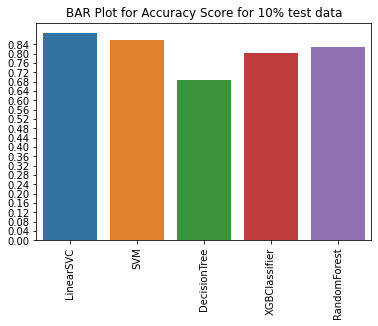

In [ ]:
# BAR Plot for Accuracy Score for 10% test data
accuracy=[LS_accuracy,S_accuracy,D_accuracy,X_accuracy,R_accuracy]
labels=['LinearSVC','SVM','DecisionTree','XGBClassifier','RandomForest']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 10% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


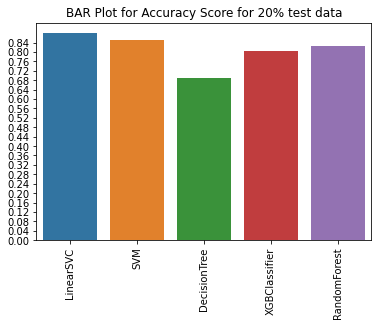

In [ ]:
# BAR Plot for Accuracy Score for 20% test data
accuracy=[ls_accuracy,s_accuracy,d_accuracy,x_accuracy,r_accuracy]
labels=['LinearSVC','SVM','DecisionTree','XGBClassifier','RandomForest']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 20% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


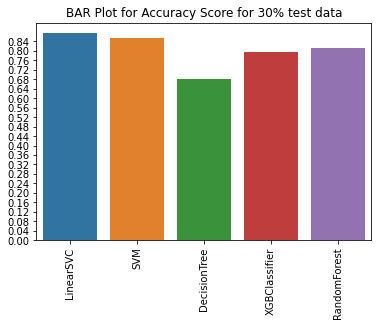

In [ ]:
# BAR Plot for Accuracy Score for 30% test data
accuracy=[lsaccuracy,saccuracy,daccuracy,xaccuracy,raccuracy]
labels=['LinearSVC','SVM','DecisionTree','XGBClassifier','RandomForest']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 30% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

# 1.3 Deep Learning


In [ ]:
# So, for our IMDB deep learning, we need to tokenize the words in a different manner from our ML.
to_binary = lambda phrase: 1 if phrase=='positive' else 0
x = Reviews['review'].tolist()
y_binary = numpy.array(Reviews['sentiment'].apply(to_binary))
tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(x)
x_tokenized = tokenizer.texts_to_sequences(x)

# Now, in average, our reviews have 128 words, so let's pad the maximum size to 130. We can make it longer but it will also make it slower
x_padded = pad_sequences(x_tokenized, maxlen=130)

print('Results of data with 10% of Testing Dataset\n')
# Split the dataset in a 90%:10%
X_train, X_test, Y_train, Y_test = train_test_split(x_padded, y_binary, test_size=0.1, random_state=0)

# Make our model
modeld1 = Sequential()
modeld1.add(Embedding(6000, 128))
modeld1.add(Bidirectional(LSTM(32, return_sequences = True)))
modeld1.add(GlobalMaxPool1D())
modeld1.add(Dense(20, activation="relu"))
modeld1.add(Dropout(0.05))
modeld1.add(Dense(1, activation="sigmoid"))
modeld1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld1.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
LSTM_predicted = modeld1.predict(X_test)
LSTM_predicted = (LSTM_predicted>0.5)
LSTM_accuracy = accuracy_score(Y_test, LSTM_predicted)
print('COMPLETE DATASET WITH LSTM\nAccuracy:',"{:.2f}".format(LSTM_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, LSTM_predicted))
print('Classification Report:\n',classification_report(Y_test, LSTM_predicted))

modeld2 = Sequential()
modeld2.add(Embedding(6000, 15, input_length=130))
modeld2.add(Dropout(0.50))
modeld2.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modeld2.add(Dropout(0.50))
modeld2.add(MaxPooling1D(pool_size=2))
modeld2.add(Flatten())
modeld2.add(Dropout(0.50))
modeld2.add(Dense(1, activation='sigmoid'))
modeld2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld2.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
CNN1_predicted = modeld2.predict(X_test)
CNN1_predicted = (CNN1_predicted>0.5)
CNN1_accuracy = accuracy_score(Y_test, CNN1_predicted)
print('COMPLETE DATASET WITH CNN (ver. 1)\nAccuracy:',"{:.2f}".format(CNN1_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, CNN1_predicted))
print('Classification Report:\n',classification_report(Y_test, CNN1_predicted))

modeld3 = Sequential()
modeld3.add(Embedding(6000, 32, input_length=130))
modeld3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modeld3.add(MaxPooling1D(pool_size=2))
modeld3.add(Flatten())
modeld3.add(Dense(250, activation='relu'))
modeld3.add(Dense(1, activation='sigmoid'))
modeld3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld3.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
CNN2_predicted = modeld3.predict(X_test)
CNN2_predicted = (CNN2_predicted>0.5)
CNN2_accuracy = accuracy_score(Y_test, CNN2_predicted)
print('COMPLETE DATASET WITH CNN (ver. 2)\nAccuracy:',"{:.2f}".format(CNN2_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, CNN2_predicted))
print('Classification Report:\n',classification_report(Y_test, CNN2_predicted))

modeld4 = Sequential()
modeld4.add(Embedding(6000, 32, input_length=130))
modeld4.add(Flatten())
modeld4.add(Dense(250, activation='relu'))
modeld4.add(Dense(1, activation='sigmoid'))
modeld4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld4.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
MLP_predicted = modeld4.predict(X_test)
MLP_predicted = (MLP_predicted>0.5)
MLP_accuracy = accuracy_score(Y_test, MLP_predicted)
print('COMPLETE DATASET WITH Multi-Layer Perceptron\nAccuracy:',"{:.2f}".format(MLP_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, MLP_predicted))
print('Classification Report:\n',classification_report(Y_test, MLP_predicted))

print('Results of data with 20% of Testing Dataset\n')
# Split the dataset in a 80%:20%
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_binary, test_size=0.2, random_state=0)

# Make our model
modeld5 = Sequential()
modeld5.add(Embedding(6000, 128))
modeld5.add(Bidirectional(LSTM(32, return_sequences = True)))
modeld5.add(GlobalMaxPool1D())
modeld5.add(Dense(20, activation="relu"))
modeld5.add(Dropout(0.05))
modeld5.add(Dense(1, activation="sigmoid"))
modeld5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld5.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
lstm_predicted = modeld5.predict(x_test)
lstm_predicted = (lstm_predicted>0.5)
lstm_accuracy = accuracy_score(y_test, lstm_predicted)
print('COMPLETE DATASET WITH LSTM\nAccuracy:',"{:.2f}".format(lstm_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, lstm_predicted))
print('Classification Report:\n',classification_report(y_test, lstm_predicted))

modeld6 = Sequential()
modeld6.add(Embedding(6000, 15, input_length=130))
modeld6.add(Dropout(0.50))
modeld6.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modeld6.add(Dropout(0.50))
modeld6.add(MaxPooling1D(pool_size=2))
modeld6.add(Flatten())
modeld6.add(Dropout(0.50))
modeld6.add(Dense(1, activation='sigmoid'))
modeld6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld6.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
cnn1_predicted = modeld6.predict(x_test)
cnn1_predicted = (cnn1_predicted>0.5)
cnn1_accuracy = accuracy_score(y_test, cnn1_predicted)
print('COMPLETE DATASET WITH CNN (ver. 1)\nAccuracy:',"{:.2f}".format(cnn1_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, cnn1_predicted))
print('Classification Report:\n',classification_report(y_test, cnn1_predicted))

modeld7 = Sequential()
modeld7.add(Embedding(6000, 32, input_length=130))
modeld7.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modeld7.add(MaxPooling1D(pool_size=2))
modeld7.add(Flatten())
modeld7.add(Dense(250, activation='relu'))
modeld7.add(Dense(1, activation='sigmoid'))
modeld7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld7.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
cnn2_predicted = modeld7.predict(x_test)
cnn2_predicted = (cnn2_predicted>0.5)
cnn2_accuracy = accuracy_score(y_test, cnn2_predicted)
print('COMPLETE DATASET WITH CNN (ver. 2)\nAccuracy:',"{:.2f}".format(cnn2_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, cnn2_predicted))
print('Classification Report:\n',classification_report(y_test, cnn2_predicted))

modeld8 = Sequential()
modeld8.add(Embedding(6000, 32, input_length=130))
modeld8.add(Flatten())
modeld8.add(Dense(250, activation='relu'))
modeld8.add(Dense(1, activation='sigmoid'))
modeld8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld8.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
mlp_predicted = modeld8.predict(x_test)
mlp_predicted = (mlp_predicted>0.5)
mlp_accuracy = accuracy_score(y_test, mlp_predicted)
print('COMPLETE DATASET WITH Multi-Layer Perceptron\nAccuracy:',"{:.2f}".format(mlp_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, mlp_predicted))
print('Classification Report:\n',classification_report(y_test, mlp_predicted))

print('Results of data with 20% of Testing Dataset\n')
# Split the dataset in a 70%:30%
xtrain, xtest, ytrain, ytest = train_test_split(x_padded, y_binary, test_size=0.3, random_state=0)

# Make our model
modeld9 = Sequential()
modeld9.add(Embedding(6000, 128))
modeld9.add(Bidirectional(LSTM(32, return_sequences = True)))
modeld9.add(GlobalMaxPool1D())
modeld9.add(Dense(20, activation="relu"))
modeld9.add(Dropout(0.05))
modeld9.add(Dense(1, activation="sigmoid"))
modeld9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld9.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
lstmpredicted = modeld9.predict(xtest)
lstmpredicted = (lstmpredicted>0.5)
lstmaccuracy = accuracy_score(ytest, lstmpredicted)
print('COMPLETE DATASET WITH LSTM\nAccuracy:',"{:.2f}".format(lstmaccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, lstmpredicted))
print('Classification Report:\n',classification_report(ytest, lstmpredicted))

modeld10 = Sequential()
modeld10.add(Embedding(6000, 15, input_length=130))
modeld10.add(Dropout(0.50))
modeld10.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modeld10.add(Dropout(0.50))
modeld10.add(MaxPooling1D(pool_size=2))
modeld10.add(Flatten())
modeld10.add(Dropout(0.50))
modeld10.add(Dense(1, activation='sigmoid'))
modeld10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modeld10.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
cnn1predicted = modeld10.predict(xtest)
cnn1predicted = (cnn1predicted>0.5)
cnn1accuracy = accuracy_score(ytest, cnn1predicted)
print('COMPLETE DATASET WITH CNN (ver. 1)\nAccuracy:',"{:.2f}".format(cnn1accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, cnn1predicted))
print('Classification Report:\n',classification_report(ytest, cnn1predicted))

modeld11 = Sequential()
modeld11.add(Embedding(6000, 32, input_length=130))
modeld11.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modeld11.add(MaxPooling1D(pool_size=2))
modeld11.add(Flatten())
modeld11.add(Dense(250, activation='relu'))
modeld11.add(Dense(1, activation='sigmoid'))
modeld11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld11.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
cnn2predicted = modeld11.predict(xtest)
cnn2predicted = (cnn2predicted>0.5)
cnn2accuracy = accuracy_score(ytest, cnn2predicted)
print('COMPLETE DATASET WITH CNN (ver. 2)\nAccuracy:',"{:.2f}".format(cnn2accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, cnn2predicted))
print('Classification Report:\n',classification_report(ytest, cnn2predicted))

modeld12 = Sequential()
modeld12.add(Embedding(6000, 32, input_length=130))
modeld12.add(Flatten())
modeld12.add(Dense(250, activation='relu'))
modeld12.add(Dense(1, activation='sigmoid'))
modeld12.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modeld12.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
mlppredicted = modeld8.predict(xtest)
mlppredicted = (mlppredicted>0.5)
mlpaccuracy = accuracy_score(ytest, mlppredicted)
print('COMPLETE DATASET WITH Multi-Layer Perceptron\nAccuracy:',"{:.2f}".format(mlpaccuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, mlppredicted))
print('Classification Report:\n',classification_report(ytest, mlppredicted))

Results of data with 10% of Testing Dataset

COMPLETE DATASET WITH LSTM
Accuracy: 86.92
Confusion Matrix:
 [[2283  270]
 [ 384 2063]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      2553
           1       0.88      0.84      0.86      2447

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

COMPLETE DATASET WITH CNN (ver. 1)
Accuracy: 85.78
Confusion Matrix:
 [[2193  360]
 [ 351 2096]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2553
           1       0.85      0.86      0.85      2447

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

COMPLETE DATASET WITH CNN (ver. 2)
Accuracy: 87.80
Confusion Matrix

In [ ]:
table=pandas.DataFrame({'Srno.':[0,1,2],
                        'LSTM':[LSTM_accuracy,lstm_accuracy,lstmaccuracy],
                        'CNN (ver. 1)':[CNN1_accuracy,cnn1_accuracy,cnn1accuracy],
                        'CNN (ver. 2)':[CNN2_accuracy,cnn2_accuracy,cnn2accuracy],
                        'Multi-Layer Perceptron':[MLP_accuracy,mlp_accuracy,mlpaccuracy]})
clf={0:'90:10',1:'80:20',2:'70:30'}
table['Train - Test split']=table['Srno.'].map(clf)
table.drop('Srno.',axis=1,inplace=True)
table

,LSTM,CNN (ver. 1),CNN (ver. 2),Multi-Layer Perceptron,Train - Test split
0,0.869200,0.8578,0.8780,0.8700,90:10
1,0.866400,0.8153,0.8721,0.8679,80:20
2,0.872867,0.7966,0.8776,0.8918,70:30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


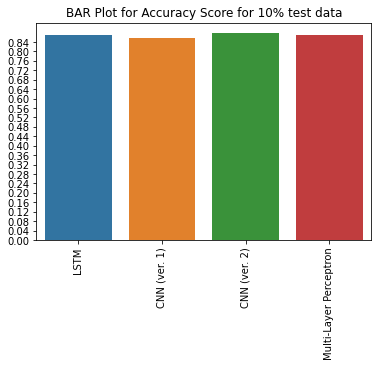

In [ ]:
# BAR Plot for Accuracy Score for 10% test data
accuracy=[LSTM_accuracy,CNN1_accuracy,CNN2_accuracy,MLP_accuracy]
labels=['LSTM','CNN (ver. 1)','CNN (ver. 2)','Multi-Layer Perceptron']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 10% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


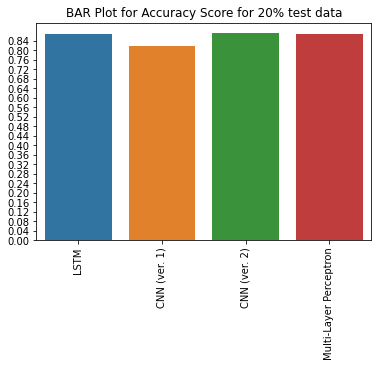

In [ ]:
# BAR Plot for Accuracy Score for 20% test data
accuracy=[lstm_accuracy,cnn1_accuracy,cnn2_accuracy,mlp_accuracy]
labels=['LSTM','CNN (ver. 1)','CNN (ver. 2)','Multi-Layer Perceptron']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 20% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


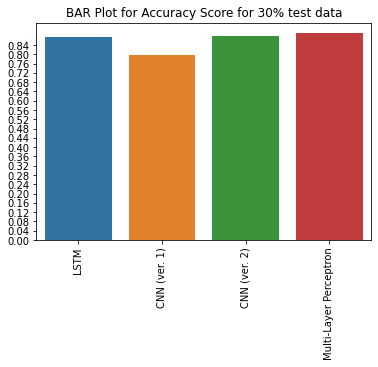

In [ ]:
# BAR Plot for Accuracy Score for 30% test data
accuracy=[lstmaccuracy,cnn1accuracy,cnn2accuracy,mlpaccuracy]
labels=['LSTM','CNN (ver. 1)','CNN (ver. 2)','Multi-Layer Perceptron']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 30% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

In [ ]:
print('Results of data with 10% of Testing Dataset\n')
modelh1= Sequential()
modelh1.add(Embedding(6000, 15, input_length=130))
modelh1.add(Dropout(0.5))
modelh1.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh1.add(Dropout(0.5))
modelh1.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh1.add(GlobalMaxPool1D())
modelh1.add(Dense(20, activation="relu"))
modelh1.add(Dropout(0.5))
modelh1.add(Flatten())
modelh1.add(Dropout(0.50))
modelh1.add(Dense(1, activation='sigmoid'))
modelh1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh1.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H1_predicted = modelh1.predict(X_test)
H1_predicted = (H1_predicted>0.5)
H1_accuracy = accuracy_score(Y_test, H1_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - LSTM\nAccuracy:',"{:.2f}".format(H1_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, H1_predicted))
print('Classification Report:\n',classification_report(Y_test, H1_predicted))

modelh2= Sequential()
modelh2.add(Embedding(6000, 32, input_length=130))
modelh2.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh2.add(MaxPooling1D(pool_size=2))
modelh2.add(Dropout(0.5))
modelh2.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh2.add(GlobalMaxPool1D())
modelh2.add(Dense(20, activation="relu"))
modelh2.add(Dropout(0.5))
modelh2.add(Flatten())
modelh2.add(Dense(250, activation='relu'))
modelh2.add(Dropout(0.50))
modelh2.add(Dense(1, activation='sigmoid'))
modelh2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh2.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H2_predicted = modelh2.predict(X_test)
H2_predicted = (H2_predicted>0.5)
H2_accuracy = accuracy_score(Y_test, H2_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - LSTM\nAccuracy:',"{:.2f}".format(H2_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, H2_predicted))
print('Classification Report:\n',classification_report(Y_test, H2_predicted))

modelh3= Sequential()
modelh3.add(Embedding(6000, 32, input_length=130))
modelh3.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh3.add(GlobalMaxPool1D())
modelh3.add(Dense(20, activation="relu"))
modelh3.add(Dropout(0.5))
modelh3.add(Flatten())
modelh3.add(Dense(250, activation='relu'))
modelh3.add(Dropout(0.50))
modelh3.add(Dense(1, activation='sigmoid'))
modelh3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh3.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H3_predicted = modelh3.predict(X_test)
H3_predicted = (H3_predicted>0.5)
H3_accuracy = accuracy_score(Y_test, H3_predicted)
print('COMPLETE DATASET WITH MLP - LSTM\nAccuracy:',"{:.2f}".format(H3_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, H3_predicted))
print('Classification Report:\n',classification_report(Y_test, H3_predicted))

modelh4= Sequential()
modelh4.add(Embedding(6000, 15, input_length=130))
modelh4.add(Dropout(0.5))
modelh4.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh4.add(Dropout(0.5))
modelh4.add(MaxPooling1D(pool_size=2))
modelh4.add(Dropout(0.5))
modelh4.add(Flatten())
modelh4.add(Dense(250, activation='relu'))
modelh4.add(Dropout(0.50))
modelh4.add(Dense(1, activation='sigmoid'))
modelh4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh4.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H4_predicted = modelh4.predict(X_test)
H4_predicted = (H4_predicted>0.5)
H4_accuracy = accuracy_score(Y_test, H4_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - MLP\nAccuracy:',"{:.2f}".format(H4_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, H4_predicted))
print('Classification Report:\n',classification_report(Y_test, H4_predicted))

modelh5= Sequential()
modelh5.add(Embedding(6000, 32, input_length=130))
modelh5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh5.add(MaxPooling1D(pool_size=2))
modelh5.add(Dropout(0.5))
modelh5.add(Flatten())
modelh5.add(Dense(250, activation='relu'))
modelh5.add(Dropout(0.50))
modelh5.add(Dense(1, activation='sigmoid'))
modelh5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh5.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H5_predicted = modelh5.predict(X_test)
H5_predicted = (H5_predicted>0.5)
H5_accuracy = accuracy_score(Y_test, H5_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - MLP\nAccuracy:',"{:.2f}".format(H5_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(Y_test, H5_predicted))
print('Classification Report:\n',classification_report(Y_test, H5_predicted))

print('Results of data with 20% of Testing Dataset\n')
modelh6= Sequential()
modelh6.add(Embedding(6000, 15, input_length=130))
modelh6.add(Dropout(0.5))
modelh6.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh6.add(Dropout(0.5))
modelh6.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh6.add(GlobalMaxPool1D())
modelh6.add(Dense(20, activation="relu"))
modelh6.add(Dropout(0.5))
modelh6.add(Flatten())
modelh6.add(Dropout(0.50))
modelh6.add(Dense(1, activation='sigmoid'))
modelh6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh6.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H6_predicted = modelh6.predict(x_test)
H6_predicted = (H6_predicted>0.5)
H6_accuracy = accuracy_score(y_test, H6_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - LSTM\nAccuracy:',"{:.2f}".format(H6_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, H6_predicted))
print('Classification Report:\n',classification_report(y_test, H6_predicted))

modelh7= Sequential()
modelh7.add(Embedding(6000, 32, input_length=130))
modelh7.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh7.add(MaxPooling1D(pool_size=2))
modelh7.add(Dropout(0.5))
modelh7.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh7.add(GlobalMaxPool1D())
modelh7.add(Dense(20, activation="relu"))
modelh7.add(Dropout(0.5))
modelh7.add(Flatten())
modelh7.add(Dense(250, activation='relu'))
modelh7.add(Dropout(0.50))
modelh7.add(Dense(1, activation='sigmoid'))
modelh7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh7.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H7_predicted = modelh7.predict(x_test)
H7_predicted = (H7_predicted>0.5)
H7_accuracy = accuracy_score(y_test, H7_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - LSTM\nAccuracy:',"{:.2f}".format(H7_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, H7_predicted))
print('Classification Report:\n',classification_report(y_test, H7_predicted))

modelh8= Sequential()
modelh8.add(Embedding(6000, 32, input_length=130))
modelh8.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh8.add(GlobalMaxPool1D())
modelh8.add(Dense(20, activation="relu"))
modelh8.add(Dropout(0.5))
modelh8.add(Flatten())
modelh8.add(Dense(250, activation='relu'))
modelh8.add(Dropout(0.50))
modelh8.add(Dense(1, activation='sigmoid'))
modelh8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh8.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H8_predicted = modelh8.predict(x_test)
H8_predicted = (H8_predicted>0.5)
H8_accuracy = accuracy_score(y_test, H8_predicted)
print('COMPLETE DATASET WITH MLP - LSTM\nAccuracy:',"{:.2f}".format(H8_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, H8_predicted))
print('Classification Report:\n',classification_report(y_test, H8_predicted))

modelh9= Sequential()
modelh9.add(Embedding(6000, 15, input_length=130))
modelh9.add(Dropout(0.5))
modelh9.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh9.add(Dropout(0.5))
modelh9.add(MaxPooling1D(pool_size=2))
modelh9.add(Dropout(0.5))
modelh9.add(Flatten())
modelh9.add(Dense(250, activation='relu'))
modelh9.add(Dropout(0.50))
modelh9.add(Dense(1, activation='sigmoid'))
modelh9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh9.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H9_predicted = modelh9.predict(x_test)
H9_predicted = (H9_predicted>0.5)
H9_accuracy = accuracy_score(y_test, H9_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - MLP\nAccuracy:',"{:.2f}".format(H9_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, H9_predicted))
print('Classification Report:\n',classification_report(y_test, H9_predicted))

modelh10= Sequential()
modelh10.add(Embedding(6000, 32, input_length=130))
modelh10.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh10.add(MaxPooling1D(pool_size=2))
modelh10.add(Dropout(0.5))
modelh10.add(Flatten())
modelh10.add(Dense(250, activation='relu'))
modelh10.add(Dropout(0.50))
modelh10.add(Dense(1, activation='sigmoid'))
modelh10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh10.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H10_predicted = modelh10.predict(x_test)
H10_predicted = (H10_predicted>0.5)
H10_accuracy = accuracy_score(y_test, H10_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - MLP\nAccuracy:',"{:.2f}".format(H10_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, H10_predicted))
print('Classification Report:\n',classification_report(y_test, H10_predicted))

print('Results of data with 30% of Testing Dataset\n')
modelh11= Sequential()
modelh11.add(Embedding(6000, 15, input_length=130))
modelh11.add(Dropout(0.5))
modelh11.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh11.add(Dropout(0.5))
modelh11.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh11.add(GlobalMaxPool1D())
modelh11.add(Dense(20, activation="relu"))
modelh11.add(Dropout(0.5))
modelh11.add(Flatten())
modelh11.add(Dropout(0.50))
modelh11.add(Dense(1, activation='sigmoid'))
modelh11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh11.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H11_predicted = modelh11.predict(xtest)
H11_predicted = (H11_predicted>0.5)
H11_accuracy = accuracy_score(ytest, H11_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - LSTM\nAccuracy:',"{:.2f}".format(H11_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, H11_predicted))
print('Classification Report:\n',classification_report(ytest, H11_predicted))

modelh12= Sequential()
modelh12.add(Embedding(6000, 32, input_length=130))
modelh12.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh12.add(MaxPooling1D(pool_size=2))
modelh12.add(Dropout(0.5))
modelh12.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh12.add(GlobalMaxPool1D())
modelh12.add(Dense(20, activation="relu"))
modelh12.add(Dropout(0.5))
modelh12.add(Flatten())
modelh12.add(Dense(250, activation='relu'))
modelh12.add(Dropout(0.50))
modelh12.add(Dense(1, activation='sigmoid'))
modelh12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh12.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H12_predicted = modelh12.predict(xtest)
H12_predicted = (H12_predicted>0.5)
H12_accuracy = accuracy_score(ytest, H12_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - LSTM\nAccuracy:',"{:.2f}".format(H12_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, H12_predicted))
print('Classification Report:\n',classification_report(ytest, H12_predicted))

modelh13= Sequential()
modelh13.add(Embedding(6000, 32, input_length=130))
modelh13.add(Bidirectional(LSTM(32, return_sequences=True)))
modelh13.add(GlobalMaxPool1D())
modelh13.add(Dense(20, activation="relu"))
modelh13.add(Dropout(0.5))
modelh13.add(Flatten())
modelh13.add(Dense(250, activation='relu'))
modelh13.add(Dropout(0.50))
modelh13.add(Dense(1, activation='sigmoid'))
modelh13.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh13.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H13_predicted = modelh13.predict(xtest)
H13_predicted = (H13_predicted>0.5)
H13_accuracy = accuracy_score(ytest, H13_predicted)
print('COMPLETE DATASET WITH MLP - LSTM\nAccuracy:',"{:.2f}".format(H13_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, H13_predicted))
print('Classification Report:\n',classification_report(ytest, H13_predicted))

modelh14= Sequential()
modelh14.add(Embedding(6000, 15, input_length=130))
modelh14.add(Dropout(0.5))
modelh14.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
modelh14.add(Dropout(0.5))
modelh14.add(MaxPooling1D(pool_size=2))
modelh14.add(Dropout(0.5))
modelh14.add(Flatten())
modelh14.add(Dense(250, activation='relu'))
modelh14.add(Dropout(0.50))
modelh14.add(Dense(1, activation='sigmoid'))
modelh14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh14.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H14_predicted = modelh14.predict(xtest)
H14_predicted = (H14_predicted>0.5)
H14_accuracy = accuracy_score(ytest, H14_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 1) - MLP\nAccuracy:',"{:.2f}".format(H14_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, H14_predicted))
print('Classification Report:\n',classification_report(ytest, H14_predicted))

modelh15= Sequential()
modelh15.add(Embedding(6000, 32, input_length=130))
modelh15.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelh15.add(MaxPooling1D(pool_size=2))
modelh15.add(Dropout(0.5))
modelh15.add(Flatten())
modelh15.add(Dense(250, activation='relu'))
modelh15.add(Dropout(0.50))
modelh15.add(Dense(1, activation='sigmoid'))
modelh15.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelh15.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=128, verbose=False, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
H15_predicted = modelh15.predict(xtest)
H15_predicted = (H15_predicted>0.5)
H15_accuracy = accuracy_score(ytest, H15_predicted)
print('COMPLETE DATASET WITH CNN (Ver. 2) - MLP\nAccuracy:',"{:.2f}".format(H15_accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(ytest, H15_predicted))
print('Classification Report:\n',classification_report(ytest, H15_predicted))

Results of data with 10% of Testing Dataset

COMPLETE DATASET WITH CNN (Ver. 1) - LSTM
Accuracy: 81.64
Confusion Matrix:
 [[1794  759]
 [ 159 2288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.70      0.80      2553
           1       0.75      0.94      0.83      2447

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.81      5000
weighted avg       0.84      0.82      0.81      5000

COMPLETE DATASET WITH CNN (Ver. 2) - LSTM
Accuracy: 85.44
Confusion Matrix:
 [[2346  207]
 [ 521 1926]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2553
           1       0.90      0.79      0.84      2447

    accuracy                           0.85      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000

COMPLETE DATASET WITH MLP - LSTM
Accuracy: 87

In [ ]:
table=pandas.DataFrame({'Srno.':[0,1,2],
                        'CNN (Ver. 1) - LSTM':[H1_accuracy,H6_accuracy,H11_accuracy],
                        'CNN (Ver. 2) - LSTM':[H2_accuracy,H7_accuracy,H12_accuracy],
                        'MLP - LSTM':[H3_accuracy,H8_accuracy,H13_accuracy],
                        'CNN (Ver. 1) - MLP':[H4_accuracy,H9_accuracy,H14_accuracy],
                        'CNN (Ver. 2) - MLP':[H5_accuracy,H10_accuracy,H15_accuracy]})
clf={0:'90:10',1:'80:20',2:'70:30'}
table['Train - Test split']=table['Srno.'].map(clf)
table.drop('Srno.',axis=1,inplace=True)
table

,CNN (Ver. 1) - LSTM,CNN (Ver. 2) - LSTM,MLP - LSTM,CNN (Ver. 1) - MLP,CNN (Ver. 2) - MLP,Train - Test split
0,0.816400,0.8544,0.8706,0.854200,0.876800,90:10
1,0.761200,0.8725,0.8646,0.863000,0.873400,80:20
2,0.823867,0.8710,0.8680,0.846467,0.863467,70:30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


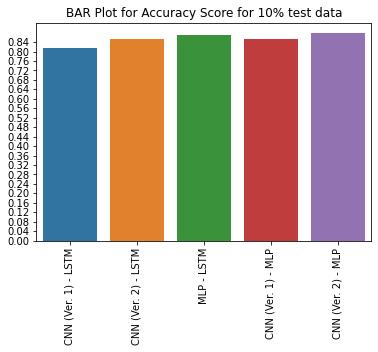

In [ ]:
# BAR Plot for Accuracy Score for 10% test data
accuracy=[H1_accuracy,H2_accuracy,H3_accuracy,H4_accuracy,H5_accuracy]
labels=['CNN (Ver. 1) - LSTM','CNN (Ver. 2) - LSTM','MLP - LSTM','CNN (Ver. 1) - MLP','CNN (Ver. 2) - MLP']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 10% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


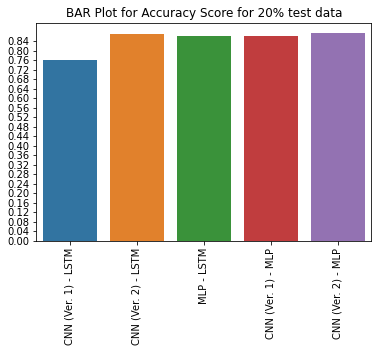

In [ ]:
# BAR Plot for Accuracy Score for 20% test data
accuracy=[H6_accuracy,H7_accuracy,H8_accuracy,H9_accuracy,H10_accuracy]
labels=['CNN (Ver. 1) - LSTM','CNN (Ver. 2) - LSTM','MLP - LSTM','CNN (Ver. 1) - MLP','CNN (Ver. 2) - MLP']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 20% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


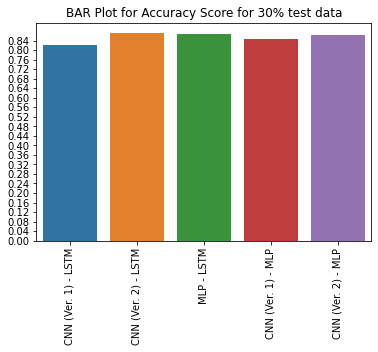

In [ ]:
# BAR Plot for Accuracy Score for 30% test data
accuracy=[H11_accuracy,H12_accuracy,H13_accuracy,H14_accuracy,H15_accuracy]
labels=['CNN (Ver. 1) - LSTM','CNN (Ver. 2) - LSTM','MLP - LSTM','CNN (Ver. 1) - MLP','CNN (Ver. 2) - MLP']
seaborn.barplot (labels, accuracy)
matplotlib.title("BAR Plot for Accuracy Score for 30% test data")
matplotlib.yticks (numpy.arange (0, .85, .04))
matplotlib.xticks (rotation=90)
matplotlib.show()

In [ ]:
table=pandas.DataFrame({'Srno.':[0,1,2,3,4,5,6,7,8,9,10,11,12,13],
                        '90:10 Split':[LS_accuracy,S_accuracy,D_accuracy,X_accuracy,R_accuracy,LSTM_accuracy,CNN1_accuracy,CNN2_accuracy,MLP_accuracy,H1_accuracy,H2_accuracy,H3_accuracy,H4_accuracy,H5_accuracy],
                        '80:20 Split':[ls_accuracy,s_accuracy,d_accuracy,x_accuracy,r_accuracy,lstm_accuracy,cnn1_accuracy,cnn2_accuracy,mlp_accuracy,H6_accuracy,H7_accuracy,H8_accuracy,H9_accuracy,H10_accuracy],
                        '70:30 Split':[lsaccuracy,saccuracy,daccuracy,xaccuracy,raccuracy,lstmaccuracy,cnn1accuracy,cnn2accuracy,mlpaccuracy,H11_accuracy,H12_accuracy,H13_accuracy,H14_accuracy,H15_accuracy]})
clf={0:'LinearSVC',1:'SVM',2:'DecisionTree',3:'XGBClassifier',4:'RandomForest',5:'LSTM',6:'CNN (ver. 1)',7:'CNN (ver. 2)',8:'Multi-Layer Perceptron',9:'CNN (Ver. 1) - LSTM',10:'CNN (Ver. 2) - LSTM',11:'MLP - LSTM',12:'CNN (Ver. 1) - MLP',13:'CNN (Ver. 2) - MLP'}
table['Model']=table['Srno.'].map(clf)
table.drop('Srno.',axis=1,inplace=True)
table

,90:10 Split,80:20 Split,70:30 Split,Model
0,0.8880,0.8800,0.875333,LinearSVC
1,0.8580,0.8490,0.853333,SVM
2,0.6860,0.6880,0.682000,DecisionTree
3,0.8020,0.8040,0.797333,XGBClassifier
4,0.8280,0.8250,0.814000,RandomForest
5,0.8692,0.8664,0.872867,LSTM
6,0.8578,0.8153,0.796600,CNN (ver. 1)
7,0.8780,0.8721,0.877600,CNN (ver. 2)
8,0.8700,0.8679,0.891800,Multi-Layer Perceptron
9,0.8164,0.7612,0.823867,CNN (Ver. 1) - LSTM
